In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [11]:
%matplotlib notebook


In [12]:
k=0.98 #N/m
mu0 = 4*np.pi*1e-7

def B2coil_der(z,I):
    return ((mu0*I*N*R**2)/2)*((-(3/2)*((2*z-R)/((z-(R/2)**2+R**2)**(5.0/2))))+(-(3/2)*((2*z-R)/((z+(R/2)**2+R**2)**(5.0/2)))))

def mu(z,s):
    return (4*np.pi*k*s*z**3)/(2*mu0)



In [13]:
r = 0.07
I = 3
N = 168
mnofp = 10**(-7)
z = np.asarray([0.008,0.018,0.028,0.038,0.048,0.058,0.068,0.078,0.088,0.098,0.108,0.118])
#nz = np.asarray([0.038,0.044,0.048,0.055,0.060,0.069,0.079,0.093,0.106])
displacement = np.array([0.005,0.008,0.01,0.012,0.013,0.014, 0.015,0.017,0.018])
amp = np.array([0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5])

for i in range(len(z)):
    z[i] = z[i] - 0.035
    #nz[i] = nz[i] - 0.035

B = mnofp*(2*np.pi*(r**2)*I*N)/(((r**2)+(z**2))**(3/2))

print(B)

[0.00367417 0.00415127 0.00445687 0.00451146 0.00429955 0.00387906
 0.00334792 0.00279864 0.0022925  0.00185778 0.00149988 0.00121225]


<IPython.core.display.Javascript object>


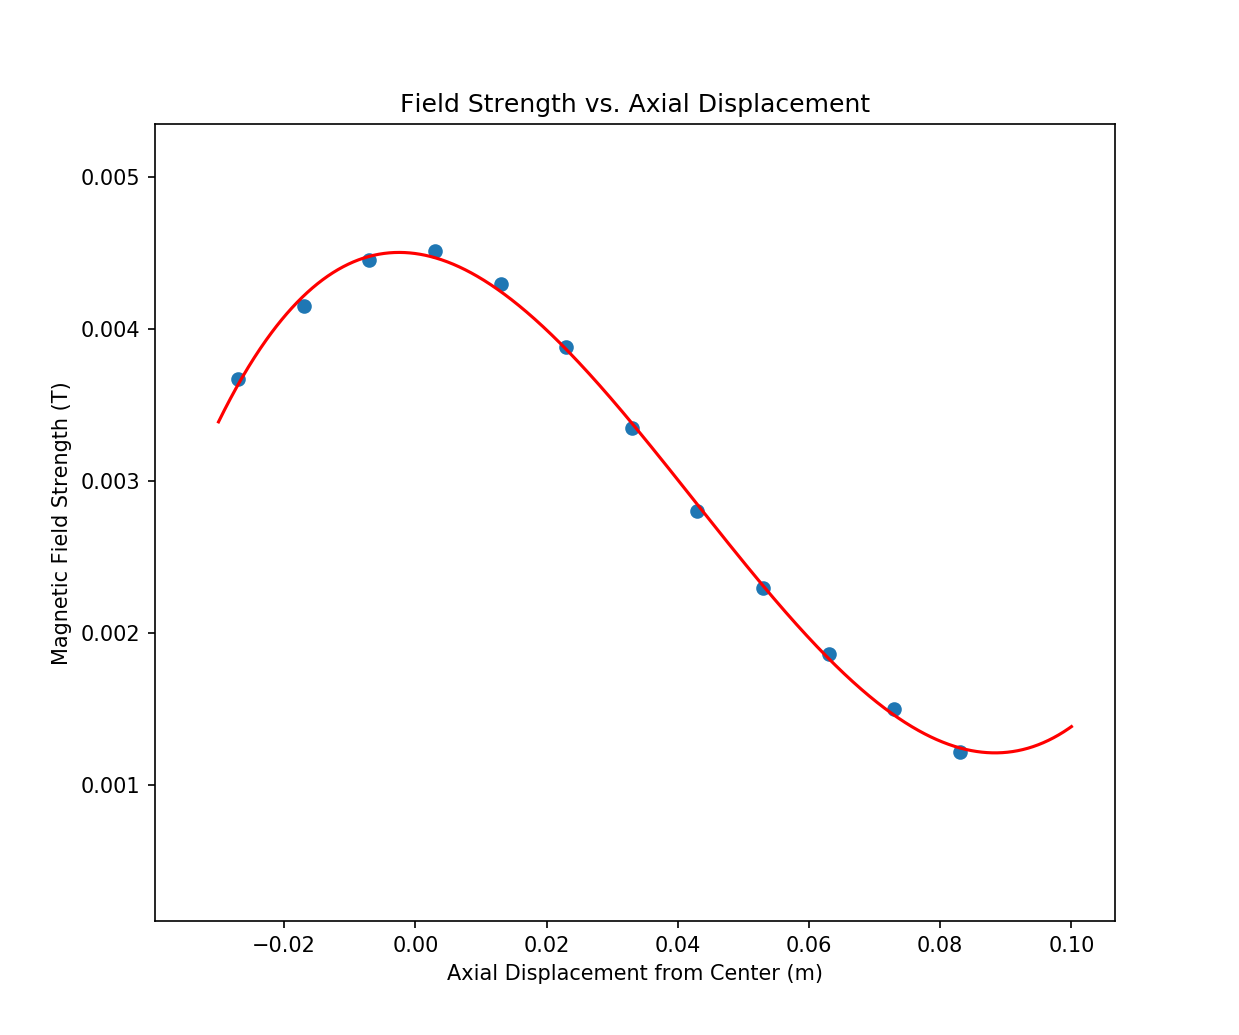

[1.96479543e+01 2.27073733e+00 6.01359530e-02 1.89261581e-03
 3.43143904e-05]


TypeError: line() takes 4 positional arguments but 6 were given

In [23]:
plt.figure()
plt.scatter(z,B)
def line(x,m,n,b):
    return m*(x**n)+b
def line2(x,m,b):
    return m*x+b

linefit,lcov= np.polyfit(z,B,4,cov=True)
exfit = np.polyfit(z,B,4)

y = np.poly1d(linefit)
xfit = np.linspace(-0.03,0.1,1000)

y2=y(xfit)

error = np.diagonal(lcov)
error = np.sqrt(error)
print(error)

plt.plot(xfit,y2,color='red')
plt.ylim(0.0001,0.00535)
plt.xlabel('Axial Displacement from Center (m)')
plt.ylabel('Magnetic Field Strength (T)')
plt.title('Field Strength vs. Axial Displacement')
plt.plot(xfit,line(xfit,*exfit),color='green',linestyle='--')


In [58]:
np.mean(displacement)
#print(amp)

#plt.scatter(displacement, amp)

0.012444444444444445

<IPython.core.display.Javascript object>


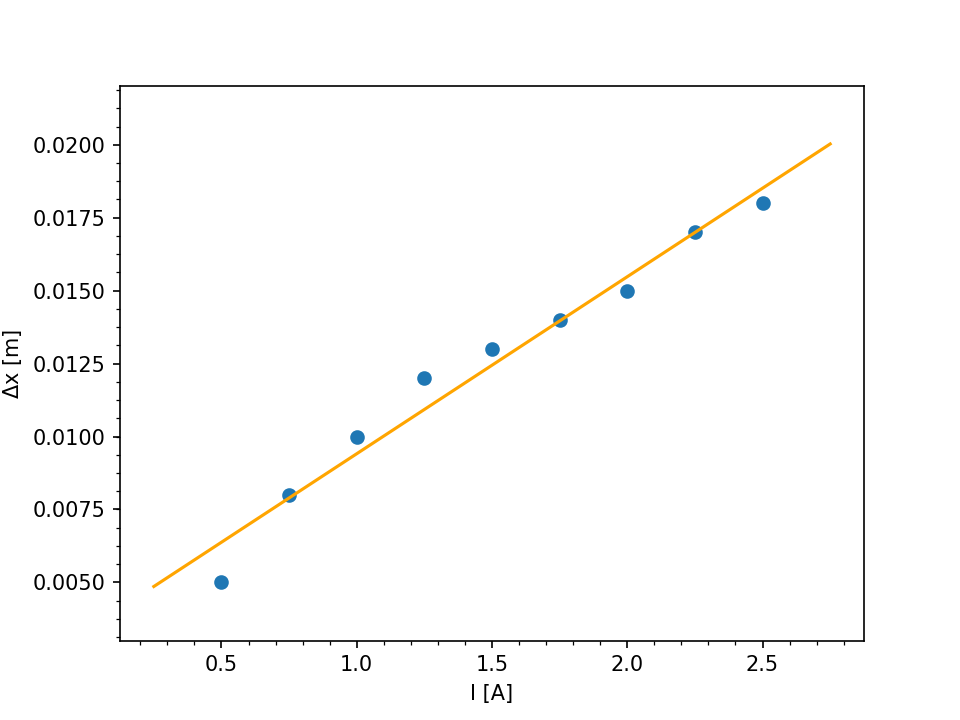

[0.00606667 0.00334444]


Text(0,0.5,'$\\Delta$x [m]')

In [15]:
fig,ax = plt.subplots()

moment_fit,mcov = curve_fit(line2,amp,displacement,p0=[0.0075,0])
print(moment_fit)
xmom = np.linspace(0.25,2.75)
ymom = line2(xmom,*moment_fit)

ax.scatter(amp,displacement)
ax.plot(xmom,ymom,color='orange')

plt.minorticks_on()
ax.set_ylim(0.003,0.022)

ax.set_xlabel('I [A]')
ax.set_ylabel(r'$\Delta$x [m]')

In [44]:
R = 0.07
mag_moment = (-k*(displacement))/B2coil_der((0.07-displacement),amp)

In [45]:
mag_moment

array([135.79311453, 144.2058281 , 135.32699133, 130.56866847,
       118.3863222 , 109.90938596, 103.79903146, 106.71597683,
       103.07971843])

In [46]:
print(np.mean(mag_moment))

120.86500414636309


In [55]:
np.mean(((displacement**3)*0.0005*3))

3.737666666666667e-09

In [25]:
np.mean(1/((2*k*(0.07-displacement)**3)/(0.07**2*mu0)))

1.6938621398801504e-05

In [56]:
B

array([0.00367417, 0.00415127, 0.00445687, 0.00451146, 0.00429955,
       0.00387906, 0.00334792, 0.00279864, 0.0022925 , 0.00185778,
       0.00149988, 0.00121225])